<a href="https://colab.research.google.com/github/karinaguerra/tech_challenge_fase_1/blob/main/Tech_Challenge_Fase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O Problema

Imagine agora, que você vai atuar como Expert em Data Analytics em uma
empresa que exporta vinhos do Brasil para o mundo todo.

Sua área é recém-criada dentro da empresa, e você será responsável pelos
relatórios iniciais a serem apresentados em uma reunião de investidores e
acionistas, explicando a quantidade de vinhos exportados e os fatores ex-
ternos que podem vir a surgir e que interferem nas análises:

1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo as
seguintes informações:

* País de origem (Brasil).
* País de destino.
* Quantidade em litros de vinho exportado (utilize: 1KG = 1L).
* valor em US$

Seu objetivo é dizer o montante de venda de exportaçáo nos últimos 15 anos, separando análise por país e trazendo quais as prospecçóes futuras e possíveis ações para urna melhoria nas exportações. Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.

> DICA:
> Para construir uma boa análise, utilize várias bases do mesmo site!
> Outro ponto interessante, é utilizar os dados externos citados acima para
> enriquecer ainda mais a mensagem que você quer passar.

# IMPORTANTE
Não esqueça de que este é entregável obrigatório!
Se atente para o prazo de entrega até o final da fase!

# Importação de Bibliotecas

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# Importação de Base da dados

In [335]:
# Base de dados sem tratamento

# Produção
producao = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/producao/Producao.csv', sep=';',thousands='.', decimal=',')

#Comercialização
comercio = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/comercializacao/Comercio.csv',sep=';',thousands='.', decimal=',')

#Processamento
processaamericana = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/processamento/ProcessaAmericanas.csv',sep=';',thousands='.', decimal=',')
processamesa = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/processamento/ProcessaMesa.csv',sep=';',thousands='.', decimal=',')
processavinifera = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/processamento/ProcessaViniferas.csv',sep=';',thousands='.', decimal=',')

#Exportação
expespumante = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpEspumantes.csv',sep=';',thousands='.', decimal=',')
expsuco = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpSuco.csv',sep=';',thousands='.', decimal=',')
expuva = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpUva.csv',sep=';',thousands='.', decimal=',')
expvinho = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpVinho.csv',sep=';',thousands='.', decimal=',')

#Importação
impespumante = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpEspumantes.csv',sep=';',thousands='.', decimal=',')
impfrescas = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpFrescas.csv',sep=';',thousands='.', decimal=',')
imppassas = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpPassas.csv',sep=';',thousands='.', decimal=',')
impsuco = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpSuco.csv',sep=';',thousands='.', decimal=',')
impvinho = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpVinhos.csv',sep=';',thousands='.', decimal=',')


# 1.Exportação

## 1.1 Exportação de uvas frescas

Na base original não tem a linha anos e Quantidade (Kg) e Valor (US$)

In [304]:
expuva.head(2)

,index,paises,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,30
1,2,"Alemanha, República Democrática",0,0,135,103,0,0,0,0,...,3277187,6532957,2384112,5161080,3353831,6730502,2870420,5833592,1863097,3480290


Retirar a primeira coluna (index) e
Transformando a coluna 'Países' em índice (index)

In [305]:
# Tirar a coluna index
expuva.drop('index', axis = 1, inplace = True)
# Transformando a coluna 'Países' em índice (index)
expuva.set_index('paises', inplace=True)

In [306]:
expuva.head(2)

,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,1974 Quantidade,1974 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
paises,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,30
"Alemanha, República Democrática",0,0,135,103,0,0,0,0,3840,3293,...,3277187,6532957,2384112,5161080,3353831,6730502,2870420,5833592,1863097,3480290


### 1.1.1 Tratamento de dados - Esportação de Uvas frescas

#### Filtro de Exportação de uvas frescas - 2004 a 2019 (15 anos)

In [308]:
# Selecionando colunas de 2004 a 2019
expuva_filtro = expuva.loc[:, '2004 Quantidade':]
expuva_filtro.head(1)

,2004 Quantidade,2004 Valor,2005 Quantidade,2005 Valor,2006 Quantidade,2006 Valor,2007 Quantidade,2007 Valor,2008 Quantidade,2008 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
paises,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,30


#### Separa as em data frame de Valor e quantidade

##### Exportação Valores (R$)

precisa: ajustar o valores de litros para quilos e fazer uma coluna e ordenar pelos maiores exportadores

In [310]:
# Filtro para pegar somente os Valores
df_valor_expuva = expuva_filtro.filter(like='Valor')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_valor_expuva.columns:
    if 'Valor' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_valor_expuva = df_valor_expuva.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_valor_expuva.head(2)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
paises,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,32130,0,0,0,0,0,0,0,0,0,30
"Alemanha, República Democrática",994204,1081566,1224605,5191457,2693071,1475757,1437429,2430345,2064845,5316776,3524291,6532957,5161080,6730502,5833592,3480290


##### Exportação em *Quantidades* (Kg)

precisa: ajustar o valores de litros para quilos e fazer uma coluna e ordenar pelos maiores exportadores

In [311]:
# df Quantidade
df_quantidade_expuva = expuva_filtro.filter(like='Quantidade')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_quantidade_expuva.columns:
    if 'Quantidade' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_quantidade_expuva = df_quantidade_expuva.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_quantidade_expuva.head(2)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
paises,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,15300,0,0,0,0,0,0,0,0,0,8
"Alemanha, República Democrática",838673,889813,818198,2256707,1297991,759594,713942,1167243,1021075,2457655,1649514,3277187,2384112,3353831,2870420,1863097


### 1.1.2 Criar grafico de total de Valor de exportação de Uvas frescas por ano

Inverter a tabela, e criar 3 colunas

In [312]:
df_valor_expuva_t = df_valor_expuva.T

valor_expuva = df_valor_expuva_t.reset_index().melt(id_vars=["index"], value_vars=df_valor_expuva_t.columns)
valor_expuva.columns = ["ano", "paises", "valor"]
valor_expuva.head()

,ano,paises,valor
0,2004,Africa do Sul,0
1,2005,Africa do Sul,0
2,2006,Africa do Sul,0
3,2007,Africa do Sul,0
4,2008,Africa do Sul,0


In [314]:
# Calcular o total exportado por ano usando groupby
total_valor_expuva_por_ano = valor_expuva.groupby('ano')['valor'].sum()

In [315]:
total_valor_expuva_por_ano.head(2)

ano
2004     52755494
2005    107276014
Name: valor, dtype: int64

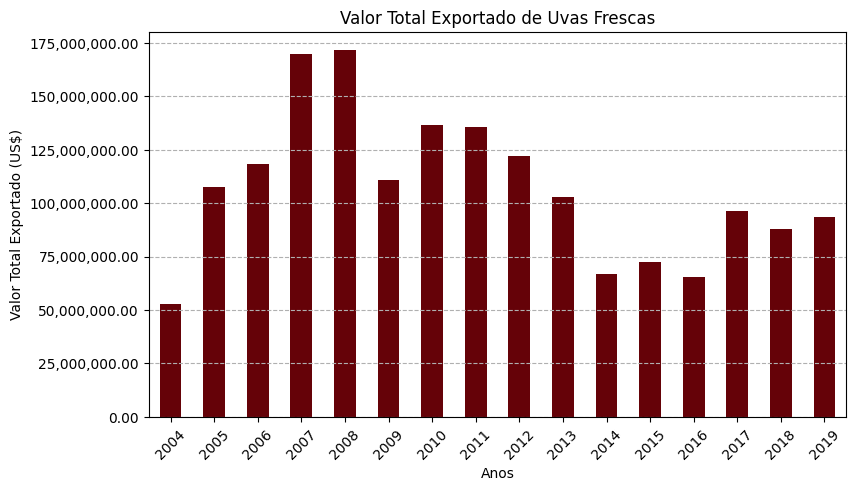

In [316]:
axis = total_valor_expuva_por_ano.plot(kind= 'bar', color='#650208', figsize=(9,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.xticks(rotation = 45)
plt.xlabel('Anos')
plt.ylabel('Valor Total Exportado (US$)')
plt.title ("Valor Total Exportado de Uvas Frescas")
plt.grid(linestyle="--", axis = "y")
plt.show()

### 1.1.3 Criar grafico de total de Quantidade de exportação de espumante por ano

Inverter a tabela, e criar 3 colunas

In [318]:
df_quantidade_expuva_t = df_quantidade_expuva.T

quantidade_expuva = df_quantidade_expuva_t.reset_index().melt(id_vars=["index"], value_vars=df_quantidade_expuva_t.columns)
quantidade_expuva.columns = ["ano", "paises", "valor"]
quantidade_expuva.head(2)

,ano,paises,valor
0,2004,Africa do Sul,0
1,2005,Africa do Sul,0


somar o total por ano somando os valores

In [319]:
# Calcular o total exportado por ano usando groupby
total_qnt_expuva_por_ano = quantidade_expuva.groupby('ano')['valor'].sum()

In [321]:
total_qnt_expuva_por_ano.head(2)

ano
2004    28815315
2005    51212801
Name: valor, dtype: int64

medida em KG colocar para Litro

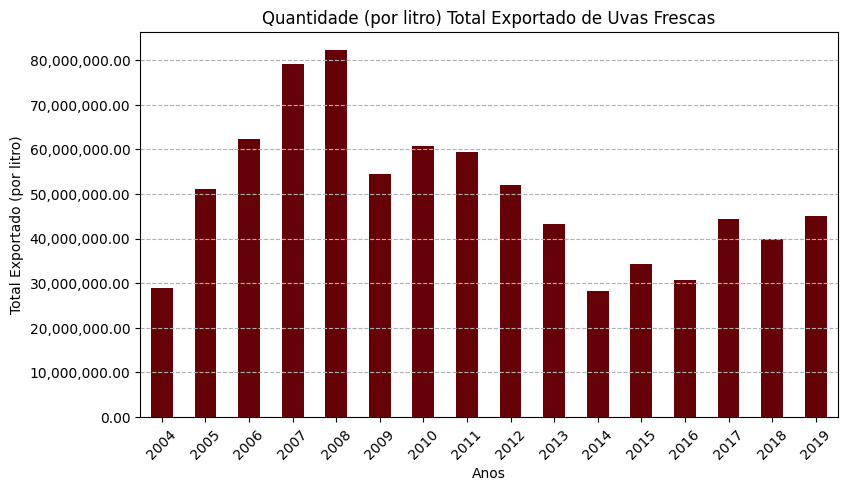

In [322]:
axis = total_qnt_expuva_por_ano.plot(kind= 'bar', color='#650208', figsize=(9,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.xticks(rotation = 45)
plt.xlabel('Anos')
plt.ylabel('Total Exportado (por litro)')
plt.title ("Quantidade (por litro) Total Exportado de Uvas Frescas")
plt.grid(linestyle="--", axis = "y")
plt.show()

## 1.2 Exportação de Espumante

In [218]:
expespumante.head(2)

,index,paises,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
0,1,Alemanha,0,0,0,0,0,0,0,0,...,6256,30939,4293,19088,4824,28799,4092,21373,1003,5466
1,2,Angola,0,0,0,0,0,0,0,0,...,0,0,90,1010,0,0,63,280,1007,3615


In [220]:
#Exportação de Espumante
expespumante.drop('index', axis = 1, inplace = True)
expespumante.set_index('paises', inplace=True)

In [222]:
expespumante.head(2)

,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,1974 Quantidade,1974 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
paises,,,,,,,,,,,,,,,,,,,,,
Alemanha,0,0,0,0,0,0,0,0,0,0,...,6256,30939,4293,19088,4824,28799,4092,21373,1003,5466
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,90,1010,0,0,63,280,1007,3615


### 1.2.1 Tratamento de dados - Exportação de Espumante

#### Filtro de exportação de espumante - 2004 a 2019

In [230]:
# Selecionando colunas de 2004 a 2019
expespumante_filtro = expespumante.loc[:, '2004 Quantidade':'2019 Valor']

#### Separa as em data frame de Valor e quantidade

##### Exportação Valores (R$)

In [231]:
# Filtro para pegar somente os Valores
df_valor_expespumante = expespumante_filtro.filter(like='Valor')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_valor_expespumante.columns:
    if 'Valor' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_valor_expespumante = df_valor_expespumante.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_valor_expespumante.head(3)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
paises,,,,,,,,,,,,,,,
Alemanha,3045,2670,928,10192,20928,29018,6877,12018,5072,30461,62169,30939,19088,28799,21373
Angola,1040,656,6657,26252,10581,33664,672533,14196,1426,21060,22423,0,1010,0,280
Antigua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Exportação em Quantidades (Kg)

In [232]:
# df Quantidade
df_quantidade_expespumante = expespumante_filtro.filter(like='Quantidade')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_quantidade_expespumante.columns:
    if 'Quantidade' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_quantidade_expespumante = df_quantidade_expespumante.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_quantidade_expespumante.head(3)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
paises,,,,,,,,,,,,,,,,
Alemanha,730,549,153,3547,5423,6648,1958,1976,833,5809,9236,6256,4293,4824,4092,1003
Angola,793,419,3314,6293,2244,11393,104138,904,73,5850,6866,0,90,0,63,1007
Antigua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


### 1.2.2 Criar grafico de total de Valor de exportação de espumante por ano

Inverter a tabela, e criar 3 colunas

In [234]:
df_valor_expespumante_t = df_valor_expespumante.T

valor_expespumante = df_valor_expespumante_t.reset_index().melt(id_vars=["index"], value_vars=df_valor_expespumante_t.columns)
valor_expespumante.columns = ["ano", "paises", "valor"]
valor_expespumante.head(2)

,ano,paises,valor
0,2004,Alemanha,3045
1,2005,Alemanha,2670


somar o total por ano somando os valores

In [243]:
# Calcular o total exportado por ano usando groupby
total_valor_expespumante_por_ano = valor_expespumante.groupby('ano')['valor'].sum()

In [244]:
total_valor_expespumante_por_ano.head()

ano
2004    237488
2005    234687
2006    287621
2007    193390
2008    548650
Name: valor, dtype: int64

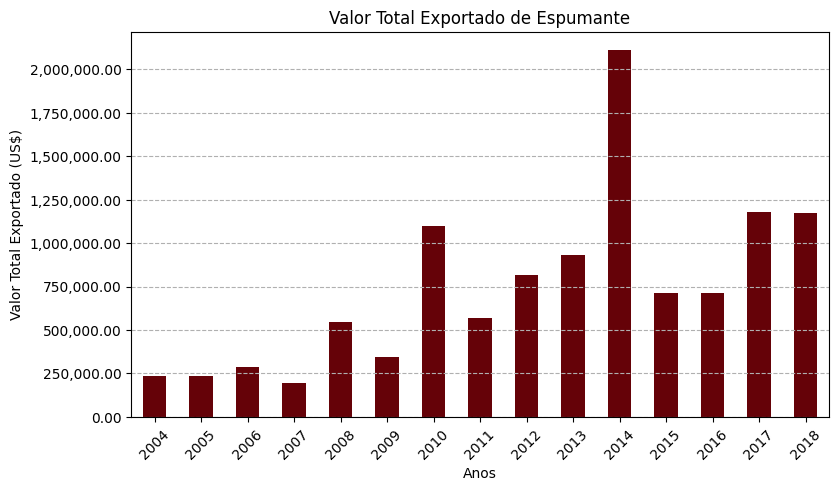

In [245]:
axis = total_valor_expespumante_por_ano.plot(kind= 'bar', color='#650208', figsize=(9,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.xticks(rotation = 45)
plt.xlabel('Anos')
plt.ylabel('Valor Total Exportado (US$)')
plt.title ("Valor Total Exportado de Espumante")
plt.grid(linestyle="--", axis = "y")
plt.show()

### 1.2.3 Criar grafico de total de Quantidade de exportação de espumante por ano

Inverter a tabela, e criar 3 colunas

In [246]:
df_quantidade_expespumante_t = df_quantidade_expespumante.T

quantidade_expespumante = df_quantidade_expespumante_t.reset_index().melt(id_vars=["index"], value_vars=df_quantidade_expespumante_t.columns)
quantidade_expespumante.columns = ["ano", "paises", "valor"]
quantidade_expespumante.head(2)

,ano,paises,valor
0,2004,Alemanha,730
1,2005,Alemanha,549


somar o total por ano somando os valores

In [247]:
# Calcular o total exportado por ano usando groupby
total_qnt_expespumante_por_ano = quantidade_expespumante.groupby('ano')['valor'].sum()

In [248]:
total_qnt_expespumante_por_ano.head()

ano
2004    198905
2005    111405
2006    160493
2007     51384
2008    355220
Name: valor, dtype: int64

medida em KG colocar para Litro

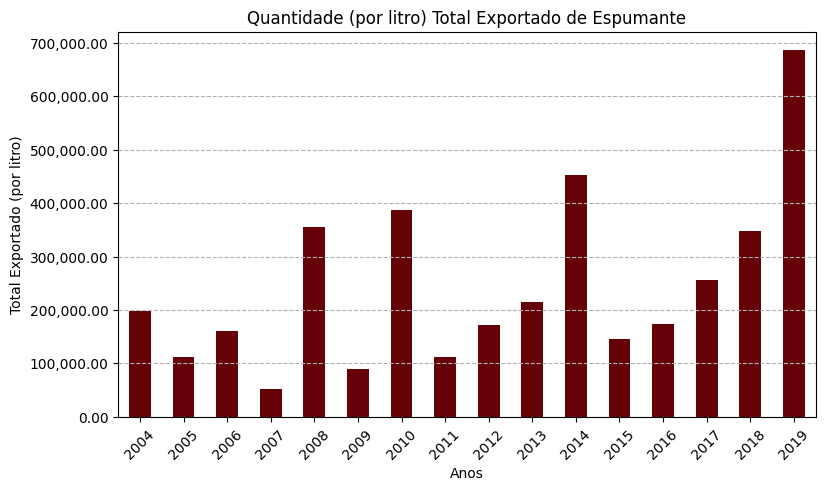

In [296]:
axis = total_qnt_expespumante_por_ano.plot(kind= 'bar', color='#650208', figsize=(9,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.xticks(rotation = 45)
plt.xlabel('Anos')
plt.ylabel('Total Exportado (por litro)')
plt.title ("Quantidade (por litro) Total Exportado de Espumante")
plt.grid(linestyle="--", axis = "y")
plt.show()

## 1.3 Exportação de Suco

In [223]:
expsuco.head(2)

,index,paises,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,"Alemanha, República Democrática da",0,0,0,0,9962,6514,238418,160979,...,6,6,0,0,0,0,96,91,12,24


In [224]:
#Exportação de Espumante
expsuco.drop('index', axis = 1, inplace = True)
expsuco.set_index('paises', inplace=True)

In [225]:
expsuco.head(2)

,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,1974 Quantidade,1974 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
paises,,,,,,,,,,,,,,,,,,,,,
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Alemanha, República Democrática da",0,0,0,0,9962,6514,238418,160979,0,0,...,6,6,0,0,0,0,96,91,12,24


### 1.3.1 Tratamento de dados - Exportação de Suco

#### Filtro de exportação de suco - 2004 a 2019

In [266]:
# Selecionando colunas de 2004 a 2019
expsuco_filtro = expsuco.loc[:, '2004 Quantidade' :]

In [268]:
expsuco_filtro.head(1)

,2004 Quantidade,2004 Valor,2005 Quantidade,2005 Valor,2006 Quantidade,2006 Valor,2007 Quantidade,2007 Valor,2008 Quantidade,2008 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
paises,,,,,,,,,,,,,,,,,,,,,
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Separa as em data frame de Valor e quantidade

##### Exportação Valores (US$)

In [269]:
# Filtro para pegar somente os Valores (US$)
df_valor_expsuco = expsuco_filtro.filter(like='Valor')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_valor_expsuco.columns:
    if 'Valor' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_valor_expsuco = df_valor_expsuco.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_valor_expsuco.head(3)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
paises,,,,,,,,,,,,,,,,
África do Sul,0,0,0,0,0,0,0,0,6324,0,0,0,0,0,0,0
"Alemanha, República Democrática da",0,0,0,0,0,0,0,0,1,5,23268,6,0,0,91,24
Angola,9495,130487,4593,23740,61246,191270,8108,0,0,21599,2880,1739,10771,1185,1553,0


##### Exportação em Quantidades (Kg)

In [270]:
# Filtro para pegar somente as Quantidades (kg)
df_quantidade_expsuco = expsuco_filtro.filter(like='Quantidade')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_quantidade_expsuco.columns:
    if 'Quantidade' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_quantidade_expsuco = df_quantidade_expsuco.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_quantidade_expsuco.head(3)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
paises,,,,,,,,,,,,,,,,
África do Sul,0,0,0,0,0,0,0,0,3739,0,0,0,0,0,0,0
"Alemanha, República Democrática da",0,0,0,0,0,0,0,0,1,4,38480,6,0,0,96,12
Angola,15534,194838,7362,43395,63263,237494,6413,0,0,5001,1200,1378,5961,160,1895,0


### 1.3.2 Criar grafico de total de Valor de exportação de suco por ano

Inverter a tabela, e criar 3 colunas

In [271]:
df_valor_expsuco_t = df_valor_expsuco.T

valor_expsuco = df_valor_expsuco_t.reset_index().melt(id_vars=["index"], value_vars=df_valor_expsuco_t.columns)
valor_expsuco.columns = ["ano", "paises", "valor"]
valor_expsuco.head(2)

,ano,paises,valor
0,2004,África do Sul,0
1,2005,África do Sul,0


somar o total por ano somando os valores

In [275]:
# Calcular o total exportado por ano usando groupby
total_valor_expsuco_por_ano = valor_expsuco.groupby('ano')['valor'].sum()

In [276]:
total_valor_expsuco_por_ano.head()

ano
2004    10619445
2005    10798481
2006     8368427
2007    12207390
2008    15174072
Name: valor, dtype: int64

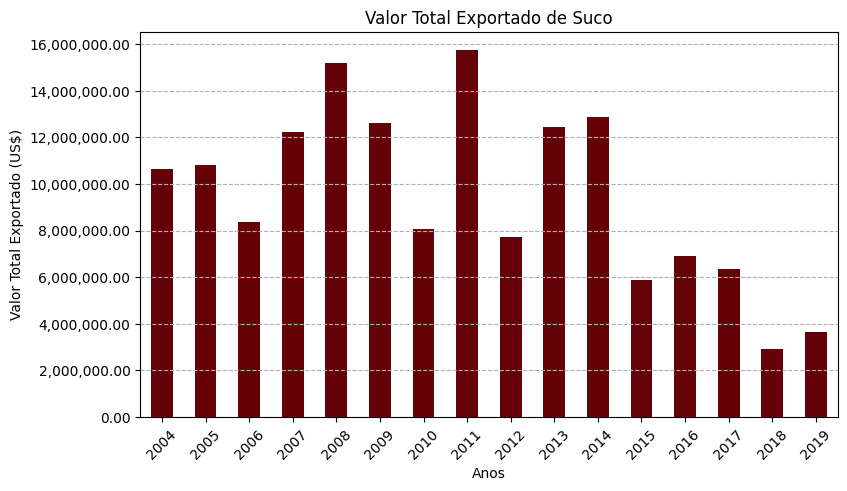

In [274]:
axis = total_valor_expsuco_por_ano.plot(kind= 'bar', color='#650208', figsize=(9,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.xticks(rotation = 45)
plt.xlabel('Anos')
plt.ylabel('Valor Total Exportado (US$)')
plt.title ("Valor Total Exportado de Suco")
plt.grid(linestyle="--", axis = "y")
plt.show()

### 1.3.3 Criar grafico de total de Quantidade de exportação de suco por ano

Inverter a tabela, e criar 3 colunas

In [277]:
df_quantidade_expsuco_t = df_quantidade_expsuco.T

quantidade_expsuco = df_quantidade_expsuco_t.reset_index().melt(id_vars=["index"], value_vars=df_quantidade_expsuco_t.columns)
quantidade_expsuco.columns = ["ano", "paises", "valor"]
quantidade_expsuco.head(2)

,ano,paises,valor
0,2004,África do Sul,0
1,2005,África do Sul,0


somar o total por ano somando os valores

In [279]:
# Calcular o total exportado por ano usando groupby
total_qnt_expsuco_por_ano = quantidade_expsuco.groupby('ano')['valor'].sum()

In [280]:
total_qnt_expsuco_por_ano.head()

ano
2004    7384237
2005    7710522
2006    5497964
2007    6622250
2008    6623263
Name: valor, dtype: int64

medida em KG colocar para Litro

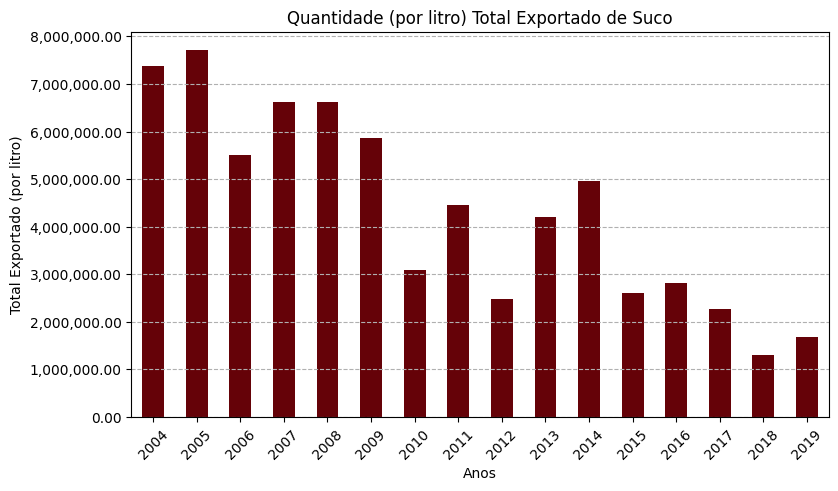

In [295]:
axis = total_qnt_expsuco_por_ano.plot(kind= 'bar', color='#650208', figsize=(9,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.xticks(rotation = 45)
plt.xlabel('Anos')
plt.ylabel('Total Exportado (por litro)')
plt.title ("Quantidade (por litro) Total Exportado de Suco")
plt.grid(linestyle="--", axis = "y")
plt.show()

## 1.4 Exportação de Vinho

In [226]:
expvinho.head(2)

,index,paises,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,95
1,2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10680,44780,14012,68109,15467,87702,10794,45382,3660,25467


In [227]:
#Exportação de Espumante
expvinho.drop('index', axis = 1, inplace = True)
expvinho.set_index('paises', inplace=True)

In [228]:
expvinho.head(2)

,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,1974 Quantidade,1974 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
paises,,,,,,,,,,,,,,,,,,,,,
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,95
"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,0,...,10680,44780,14012,68109,15467,87702,10794,45382,3660,25467


### 1.4.1 Tratamento de dados - Exportação de Vinho

#### Filtro de exportação de Vinho - 2004 a 2019

In [282]:
# Selecionando colunas de 2004 a 2019
expvinho_filtro = expvinho.loc[:, '2004 Quantidade' :]

In [283]:
expvinho_filtro.head(1)

,2004 Quantidade,2004 Valor,2005 Quantidade,2005 Valor,2006 Quantidade,2006 Valor,2007 Quantidade,2007 Valor,2008 Quantidade,2008 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
paises,,,,,,,,,,,,,,,,,,,,,
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,95


#### Separa as em data frame de Valor e quantidade

##### Exportação Valores (US$)

In [284]:
# Filtro para pegar somente os Valores (US$)
df_valor_expvinho = expvinho_filtro.filter(like='Valor')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_valor_expvinho.columns:
    if 'Valor' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_valor_expvinho = df_valor_expvinho.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_valor_expvinho.head(3)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
paises,,,,,,,,,,,,,,,,
África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95
"Alemanha, República Democrática",28140,106702,89231,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467
Angola,50382,33039,18293,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065


##### Exportação em Quantidades (Kg)

In [285]:
# Filtro para pegar somente as Quantidades (kg)
df_quantidade_expvinho = expvinho_filtro.filter(like='Quantidade')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_quantidade_expvinho.columns:
    if 'Quantidade' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_quantidade_expvinho = df_quantidade_expvinho.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_quantidade_expvinho.head(3)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
paises,,,,,,,,,,,,,,,,
África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26
"Alemanha, República Democrática",13589,57393,38302,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660
Angola,37573,24056,3766,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345


### 1.4.2 Criar grafico de total de Valor de exportação de Vinho por ano

Inverter a tabela, e criar 3 colunas

In [286]:
df_valor_expvinho_t = df_valor_expvinho.T

valor_expvinho = df_valor_expvinho_t.reset_index().melt(id_vars=["index"], value_vars=df_valor_expvinho_t.columns)
valor_expvinho.columns = ["ano", "paises", "valor"]
valor_expvinho.head(2)

,ano,paises,valor
0,2004,África do Sul,0
1,2005,África do Sul,0


somar o total por ano somando os valores

In [287]:
# Calcular o total exportado por ano usando groupby
total_valor_expvinho_por_ano = valor_expvinho.groupby('ano')['valor'].sum()

In [288]:
total_valor_expvinho_por_ano.head()

ano
2004    1590613
2005    2566000
2006    2658107
2007    3686150
2008    7118100
Name: valor, dtype: int64

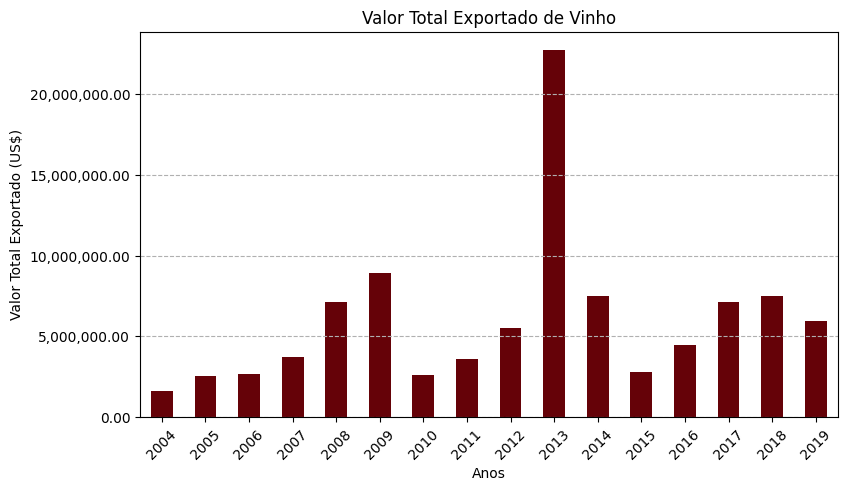

In [290]:
axis = total_valor_expvinho_por_ano.plot(kind= 'bar', color='#650208', figsize=(9,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.xticks(rotation = 45)
plt.xlabel('Anos')
plt.ylabel('Valor Total Exportado (US$)')
plt.title ("Valor Total Exportado de Vinho")
plt.grid(linestyle="--", axis = "y")
plt.show()

### 1.4.3 Criar grafico de total de Quantidade de exportação de suco por ano

Inverter a tabela, e criar 3 colunas

In [291]:
df_quantidade_expvinho_t = df_quantidade_expvinho.T

quantidade_expvinho = df_quantidade_expvinho_t.reset_index().melt(id_vars=["index"], value_vars=df_quantidade_expvinho_t.columns)
quantidade_expvinho.columns = ["ano", "paises", "valor"]
quantidade_expvinho.head(2)

,ano,paises,valor
0,2004,África do Sul,0
1,2005,África do Sul,0


In [397]:
# Transformando a quantidade de kg para litros
quantidade_expvinho['valor'] = quantidade_expvinho['valor'] / 1000
quantidade_expvinho.head()

,ano,paises,valor
0,2004,África do Sul,0.00
1,2005,África do Sul,0.00
2,2006,África do Sul,0.00
3,2007,África do Sul,0.00
4,2008,África do Sul,0.00


somar o total por ano somando os valores

In [398]:
# Calcular o total exportado por ano usando groupby
total_qnt_expvinho_por_ano = quantidade_expvinho.groupby('ano')['valor'].sum()

In [399]:
total_qnt_expvinho_por_ano.head()

ano
2004    2801.99
2005    3529.79
2006    3415.32
2007    3281.75
2008   10346.32
Name: valor, dtype: float64

medida em KG colocar para Litro

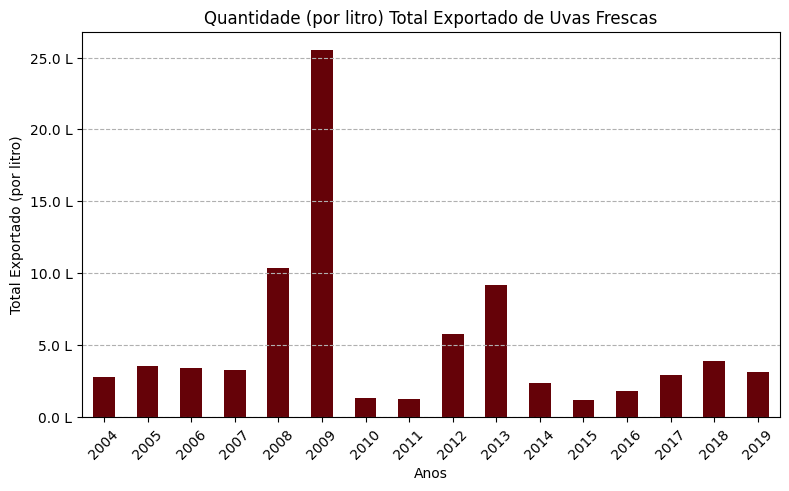

In [403]:
axis = total_qnt_expvinho_por_ano.plot(kind= 'bar', color='#650208', figsize=(9,5))
# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1000:.1f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))

plt.xticks(rotation = 45)
plt.xlabel('Anos')
plt.ylabel('Total Exportado (por litro)')
plt.title ("Quantidade (por litro) Total Exportado de Uvas Frescas")
plt.grid(linestyle="--", axis = "y")
plt.show()

 # 2.Produção

In [341]:
producao.head(1)

,index,p_produto,produto,1970 quantidade,1971 quantidade,1972 quantidade,1973 quantidade,1974 quantidade,1975 quantidade,1976 quantidade,...,2010 quantidade,2011 quantidade,2012 quantidade,2013 quantidade,2014 quantidade,2015 quantidade,2016 quantidade,2017 quantidade,2018 quantidade,2019 quantidade
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737


## 2.1 Tratamento de dados Produção

In [342]:
#Produção retirar as duas primeras colunas
producao.drop(['index', 'p_produto'], axis = 1, inplace = True)
# Transformando a coluna 'Produto' em índice (index)
producao.set_index('produto', inplace=True)

In [343]:
# Selecionando colunas de 2004 a 2019
producao_filtro = producao.loc[:, '2004 quantidade':]
producao_filtro.head(2)

,2004 quantidade,2005 quantidade,2006 quantidade,2007 quantidade,2008 quantidade,2009 quantidade,2010 quantidade,2011 quantidade,2012 quantidade,2013 quantidade,2014 quantidade,2015 quantidade,2016 quantidade,2017 quantidade,2018 quantidade,2019 quantidade
produto,,,,,,,,,,,,,,,,
VINHO DE MESA,313962284,226080432,185100887,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737
Tinto,254172425,180698666,149552555,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115


In [344]:
# Filtro para pegar somente os Valores
producao_quantidade = producao_filtro.filter(like='quantidade')

# Função para renomeando colunas para incluir apenas o ano
for coluna in producao_quantidade.columns:
    if 'quantidade' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        producao_quantidade = producao_quantidade.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
producao_quantidade.head(2)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
produto,,,,,,,,,,,,,,,,
VINHO DE MESA,313962284,226080432,185100887,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737
Tinto,254172425,180698666,149552555,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115


## 2.2 Produção de vinho de mesa

Selecionar linhas de vinho de mesa

In [345]:
producao_vinho_mesa = producao_quantidade.iloc[1:4, :]
producao_vinho_mesa

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
produto,,,,,,,,,,,,,,,,
Tinto,254172425,180698666,149552555,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115
Branco,51719967,39212146,31738390,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828
Rosado,8069892,6169620,3809942,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794


inverter a linha para coluna

In [346]:
# Inverter tabela a linha para coluna
producao_vinho_mesa_t = producao_vinho_mesa.T

# criar uma nova tabela com de 3 colunas
producao_mesa = producao_vinho_mesa_t.reset_index().melt(id_vars=["index"], value_vars=producao_vinho_mesa_t.columns)
producao_mesa.columns = ["ano", "vinho_mesa", "quantidade"]
producao_mesa.head()

,ano,vinho_mesa,quantidade
0,2004,Tinto,254172425
1,2005,Tinto,180698666
2,2006,Tinto,149552555
3,2007,Tinto,228156220
4,2008,Tinto,241057928


In [359]:
# Transformando a quantidade de kg para litros
producao_mesa['quantidade'] = producao_mesa['quantidade'] / 1000
producao_mesa.head()


,ano,vinho_mesa,quantidade
0,2004,Tinto,254172.42
1,2005,Tinto,180698.67
2,2006,Tinto,149552.55
3,2007,Tinto,228156.22
4,2008,Tinto,241057.93


### 2.2.1 Grafico de produção de vinho de mesa

<function matplotlib.pyplot.show(close=None, block=None)>

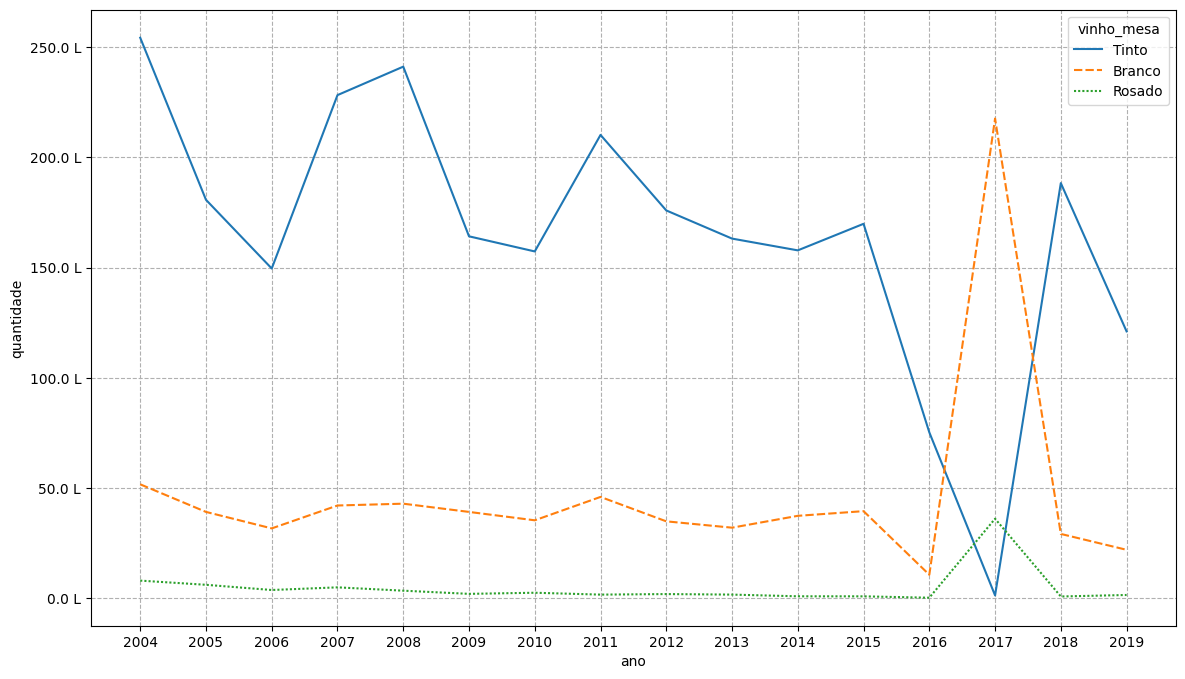

In [387]:
plt.figure(figsize=(14,8))
#palettes = sns.color_palette("Paired")
axis = sns.lineplot(data=producao_mesa, x="ano", y="quantidade", hue="vinho_mesa", style="vinho_mesa") #, palette = palettes)
#axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{valor/1000:.1f}'))

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1000:.1f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))


plt.grid(linestyle="--")
plt.show

## 2.3 Produção de Vinho fino de mesa (VINÍFERA)

In [348]:
producao_vinho_fino = producao_quantidade.iloc[5:8, :]
producao_vinho_fino

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
produto,,,,,,,,,,,,,,,,
Tinto,23062182,25409805,18868108,24786071,27583032,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377
Branco,19803647,20012363,13249969,17598428,18812571,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055
Rosado,36779,31730,50900,791985,938898,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990


In [349]:
producao_vinho_fino_t = producao_vinho_fino.T

producao_fino = producao_vinho_fino_t.reset_index().melt(id_vars=["index"], value_vars=producao_vinho_fino_t.columns)
producao_fino.columns = ["ano", "vinho_mesa", "quantidade"]
producao_fino.head()

,ano,vinho_mesa,quantidade
0,2004,Tinto,23062182
1,2005,Tinto,25409805
2,2006,Tinto,18868108
3,2007,Tinto,24786071
4,2008,Tinto,27583032


In [389]:
# Transformando a quantidade de kg para litros
producao_fino['quantidade'] = producao_fino['quantidade'] / 1000
producao_fino.head()


,ano,vinho_mesa,quantidade
0,2004,Tinto,23062.18
1,2005,Tinto,25409.81
2,2006,Tinto,18868.11
3,2007,Tinto,24786.07
4,2008,Tinto,27583.03


### 2.3.1 Grafico de produção de Vinhos finos de Mesa

<ipython-input-390-192231e4e00e>:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  axis = sns.lineplot(data=producao_fino, x="ano", y="quantidade", hue="vinho_mesa", style="vinho_mesa", palette = palettes)


<function matplotlib.pyplot.show(close=None, block=None)>

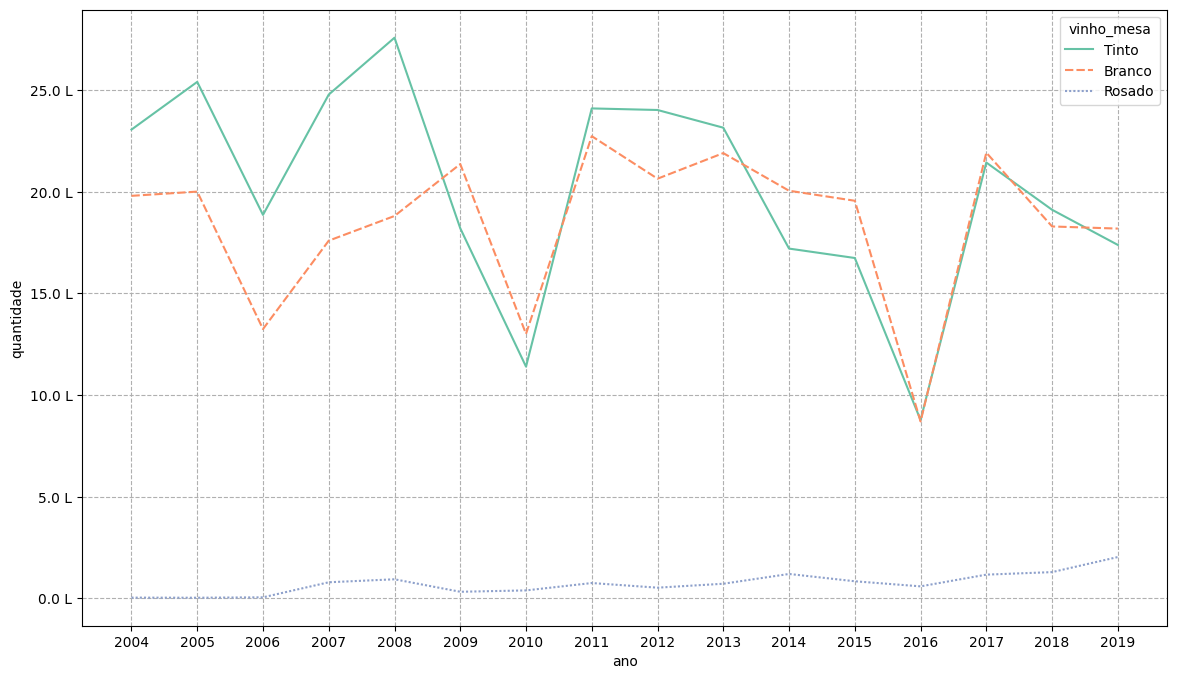

In [390]:
plt.figure(figsize=(14,8))
palettes = sns.color_palette("Set2")
axis = sns.lineplot(data=producao_fino, x="ano", y="quantidade", hue="vinho_mesa", style="vinho_mesa", palette = palettes)

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1000:.1f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))


plt.grid(linestyle="--")
plt.show

## 2.4 Produção de Suco

In [351]:
producao_suco = producao_quantidade.iloc[9:13, :]

In [352]:
producao_suco_t = producao_suco.T

producao_suco_uva = producao_suco_t.reset_index().melt(id_vars=["index"], value_vars=producao_suco_t.columns)
producao_suco_uva.columns = ["ano", "produto", "quantidade"]
producao_suco_uva.head()

,ano,produto,quantidade
0,2004,Suco de uva integral,6222380
1,2005,Suco de uva integral,7103175
2,2006,Suco de uva integral,13946491
3,2007,Suco de uva integral,10147037
4,2008,Suco de uva integral,11817941


In [391]:
# Transformando a quantidade de kg para litros
producao_suco_uva['quantidade'] = producao_suco_uva['quantidade'] / 1000
producao_suco_uva.head()


,ano,produto,quantidade
0,2004,Suco de uva integral,6222.38
1,2005,Suco de uva integral,7103.18
2,2006,Suco de uva integral,13946.49
3,2007,Suco de uva integral,10147.04
4,2008,Suco de uva integral,11817.94


### 2.4.1 Grafico de produção de Suco

<ipython-input-392-36d28b307837>:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  axis = sns.lineplot(data=producao_suco_uva, x="ano", y="quantidade", hue="produto", style="produto", palette = palettes)


<function matplotlib.pyplot.show(close=None, block=None)>

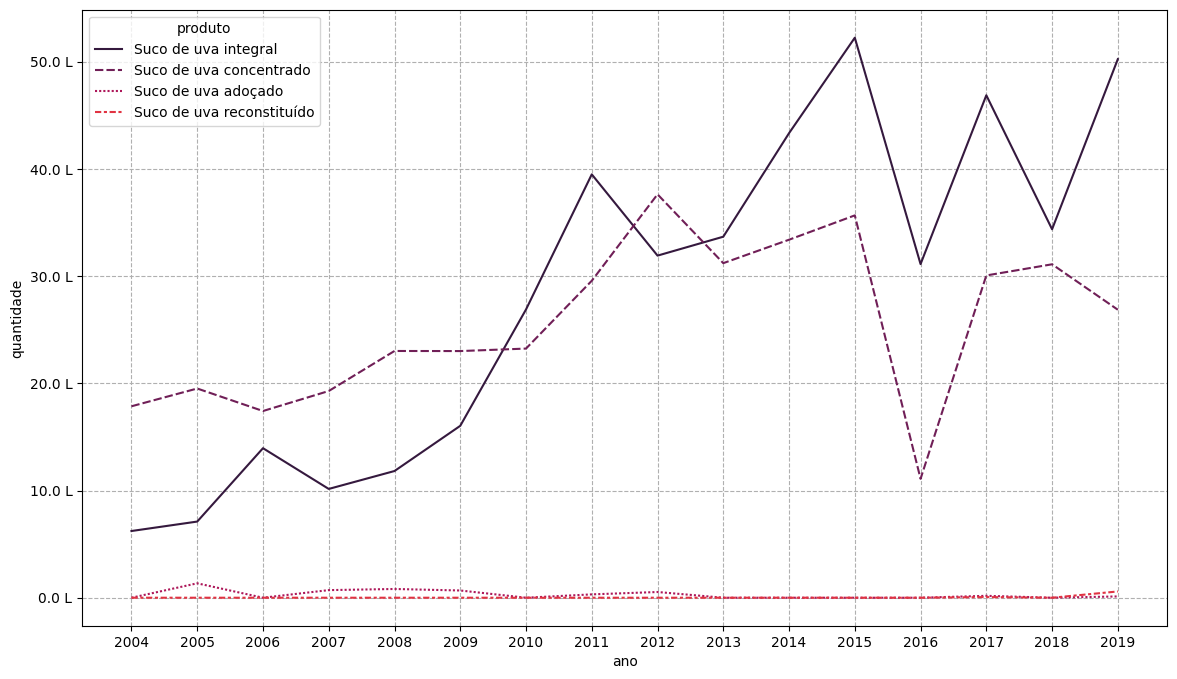

In [392]:
plt.figure(figsize=(14,8))
palettes = sns.color_palette("rocket")
axis = sns.lineplot(data=producao_suco_uva, x="ano", y="quantidade", hue="produto", style="produto", palette = palettes)

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1000:.1f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))

plt.grid(linestyle="--")
plt.show

## 2.5 Produção de Derivados

In [354]:
producao.tail(1)

,1970 quantidade,1971 quantidade,1972 quantidade,1973 quantidade,1974 quantidade,1975 quantidade,1976 quantidade,1977 quantidade,1978 quantidade,1979 quantidade,...,2010 quantidade,2011 quantidade,2012 quantidade,2013 quantidade,2014 quantidade,2015 quantidade,2016 quantidade,2017 quantidade,2018 quantidade,2019 quantidade
produto,,,,,,,,,,,,,,,,,,,,,
Outros derivados,0,0,0,0,0,0,0,0,0,0,...,0,5600,0,0,0,0,0,0,0,0


In [355]:
producao_derivados = producao_quantidade.iloc[14:45, :]

In [356]:
producao_derivados_t = producao_derivados.T

producao_derivado = producao_derivados_t.reset_index().melt(id_vars=["index"], value_vars=producao_derivados_t.columns)
producao_derivado.columns = ["ano", "produto", "quantidade"]
producao_derivado.head()

,ano,produto,quantidade
0,2004,Espumante,3999
1,2005,Espumante,1920
2,2006,Espumante,26600
3,2007,Espumante,0
4,2008,Espumante,88690


In [393]:
# Transformando a quantidade de kg para litros
producao_derivado['quantidade'] = producao_derivado['quantidade'] / 1000
producao_derivado.head()

,ano,produto,quantidade
0,2004,Espumante,4.00
1,2005,Espumante,1.92
2,2006,Espumante,26.60
3,2007,Espumante,0.00
4,2008,Espumante,88.69


### 2.5.1 Grafico de produção de derivados

<ipython-input-394-5d2268817242>:3: UserWarning: 
The palette list has fewer values (10) than needed (31) and will cycle, which may produce an uninterpretable plot.
  axis = sns.lineplot(data=producao_derivado, x="ano", y="quantidade", hue="produto", style="produto", palette = palettes)


<function matplotlib.pyplot.show(close=None, block=None)>

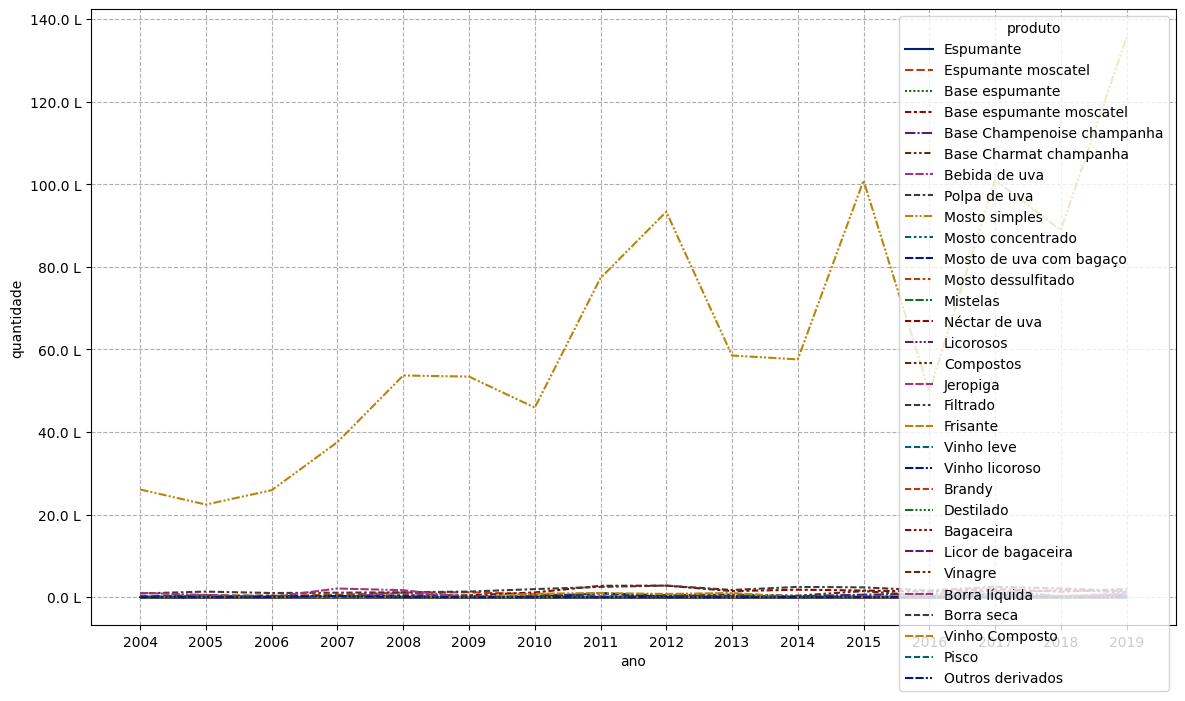

In [394]:
plt.figure(figsize=(14,8))
palettes = sns.color_palette("dark")
axis = sns.lineplot(data=producao_derivado, x="ano", y="quantidade", hue="produto", style="produto", palette = palettes)

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1000:.1f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))


plt.grid(linestyle="--")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1600x800 with 0 Axes>

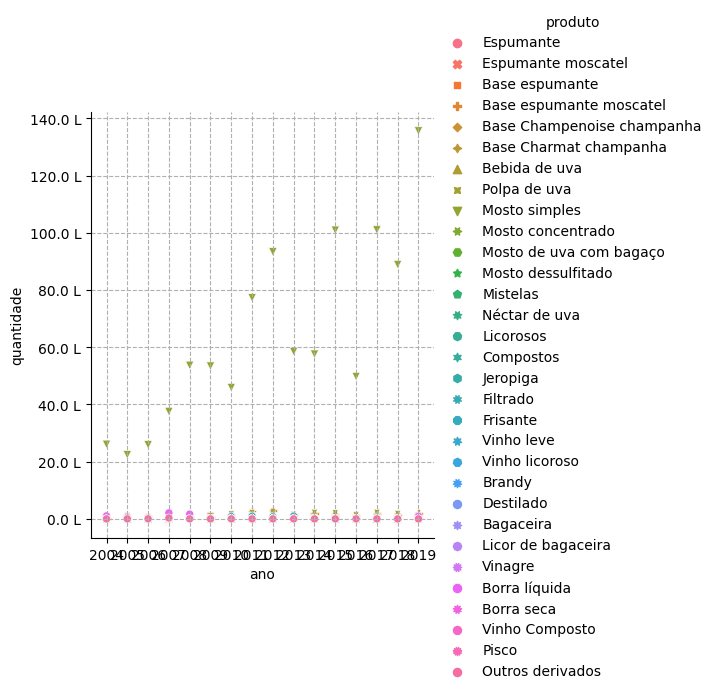

In [395]:
plt.figure(figsize=(16,8))
axis = sns.relplot(data=producao_derivado, x="ano", y="quantidade", hue="produto", style="produto")

# Personalizar o eixo y para exibir a quantidade em litros
def formatar_quantidade_litros(valor, pos):
    return f"{valor/1000:.1f} L"  # Dividindo por 1000 para converter para mil litros

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_quantidade_litros))


plt.grid(linestyle="--")
plt.show